In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, sample, audio, utils, viz

In [3]:
p, n_examples, n_samples = model.HParams(n_audio_chans=1), 2**3, 4
X = audio.load_dataset_from_track('data/steinway.wav', audio.HParams())[:n_examples]
m = model.Wavenet(p)
t = train.Trainer(m, X, None, train.HParams(max_epochs=1, batch_size=1, ckpt_path='checkpoints'), None)

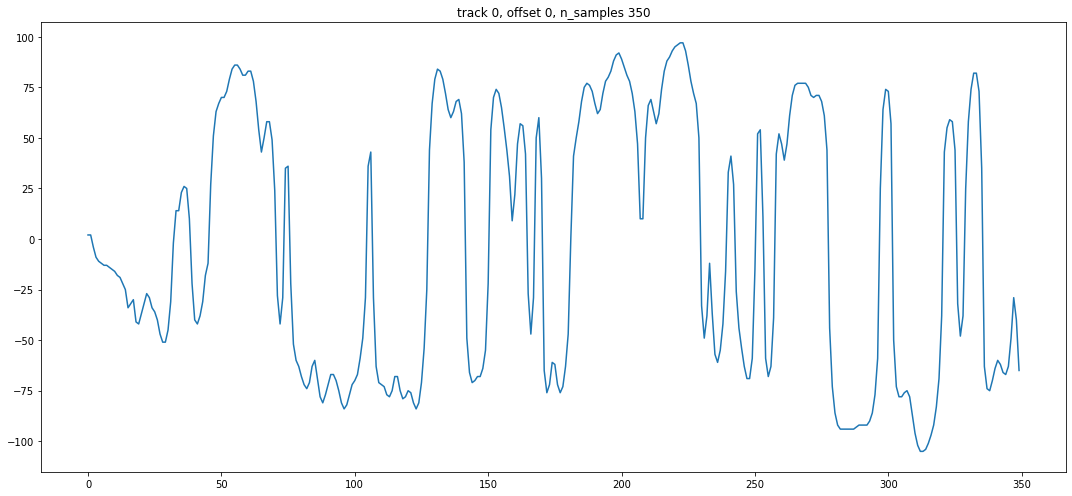

In [4]:
track_i = viz.plot_track(X)

In [5]:
ipd.Audio(X[track_i].squeeze(), rate=p.sampling_rate)

In [6]:
t.train()

1:7 loss 52.48278 lr 3.000000e-04: 100%|██████████| 8/8 [01:11<00:00,  8.95s/it] 


In [7]:
_, track = sample.sample(m, 10000)

0

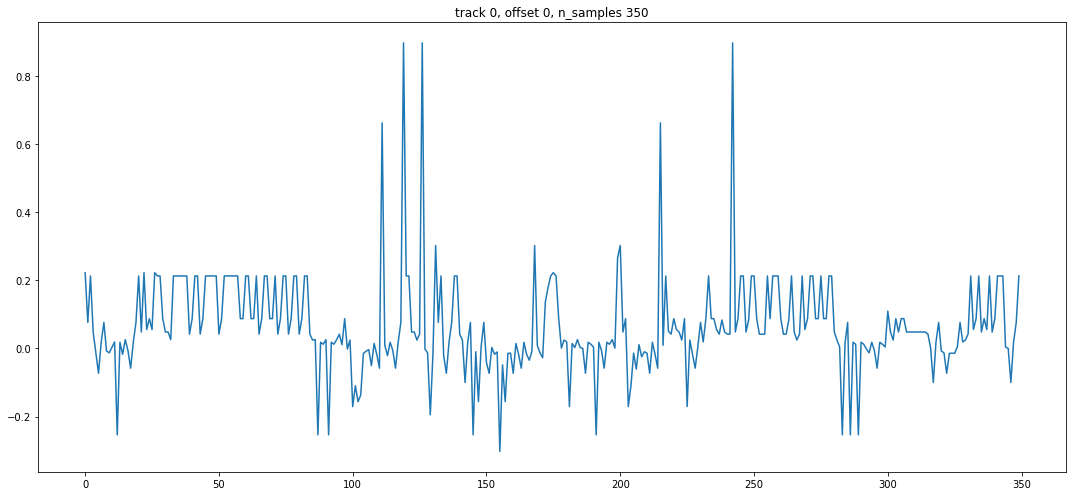

In [8]:
viz.plot_track(track)

In [9]:
ipd.Audio(track[0].squeeze(), rate=p.sampling_rate)